# Pré-processamento de dados
### Ao final desta etapa teremos 4 conjuntos de dados de acordo com o esquema abaixo:

<img src="https://user-images.githubusercontent.com/75253596/178109117-ed20f5d5-34c1-42da-a4f7-38d6ed688a07.png" width="560" height="420">

### imports

In [17]:
import sys
import nltk
import demoji
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt
# from datetime import datetime, timezone

In [2]:
nltk.download("rslp");

[nltk_data] Downloading package rslp to /home/gus/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


#### add o path local + imports das libs continas na pasta src

In [3]:
sys.path.append("..")

In [4]:
from src.deployment.EDA_module import *
from src.data.data_cleaning_module import *

In [30]:
# configuração do tamanho de imagens
plt.rcParams["figure.figsize"] = (15, 12)

#### Carregando as Stopwords do NLTK

In [14]:
stopwords = nltk.corpus.stopwords.words('portuguese');

# carregamento de dados cus

In [6]:
df = pd.read_csv("../data/no-theme-tweets/rawNoThemeTweets.csv", delimiter=",")

In [8]:
df.head(3)

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)


### Remoção de colunas desnecessárias id e query_used

In [12]:
df.drop(["id", "query_used"], axis=1, inplace=True)

In [18]:
df.columns

Index(['tweet_text', 'tweet_date', 'sentiment'], dtype='object')

### remoção de texto duplicado

In [19]:
df.drop_duplicates(["tweet_text"], inplace=True)

### remoção de emojis, links e caracteres especiais

In [20]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: demoji.replace(x, " "))
df["tweet_text"] = df["tweet_text"].apply(lambda x: limpa_texto(x))

### Salvando o texto limpo

In [22]:
df.to_csv("../data/no-theme-tweets/CleanText.csv", sep = ",", index = False)

### Geração de novos dados pro dataframe

In [25]:
df = df.assign(
    number_words = df.tweet_text.apply(lambda x: len(x.split(" "))),
)  # adiciona coluna com número de palavras

df = df.assign(
    avg_word_length=df.tweet_text.str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)  # adiciona coluna com média de caracteres por palavra no tweet

formated_df = df.drop(
    df[df.number_words < 5].index
)  # remove tweets com menos de 5 palavras

formated_df

/home/gus/.cache/pypoetry/virtualenvs/src-YPTU7TNM-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gus/.cache/pypoetry/virtualenvs/src-YPTU7TNM-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,tweet_text,tweet_date,sentiment,number_words,avg_word_length
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000
1,O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667
2,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364
3,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000
4,"Pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.200000
...,...,...,...,...,...
785809,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857
785810,"Olá, Mayck. Você já é cliente Claro? Caso não ...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.965517
785811,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667
785812,Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000


### Separação dos tweets em positivos e negativos + junção dos textos
### positive_text, negative_text e all_text

In [28]:
df_positivo = formated_df.query("sentiment == 'positivo'")
df_negativo = formated_df.query("sentiment == 'negativo'")
df_all = formated_df

positive_text = " ".join(df_positivo.tweet_text)
negative_text = " ".join(df_negativo.tweet_text)
all_text = " ".join(df_all.tweet_text)

### cria as 50 stopwords que mais aparecem no corpus

analyzed stopwords:
 ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivesse

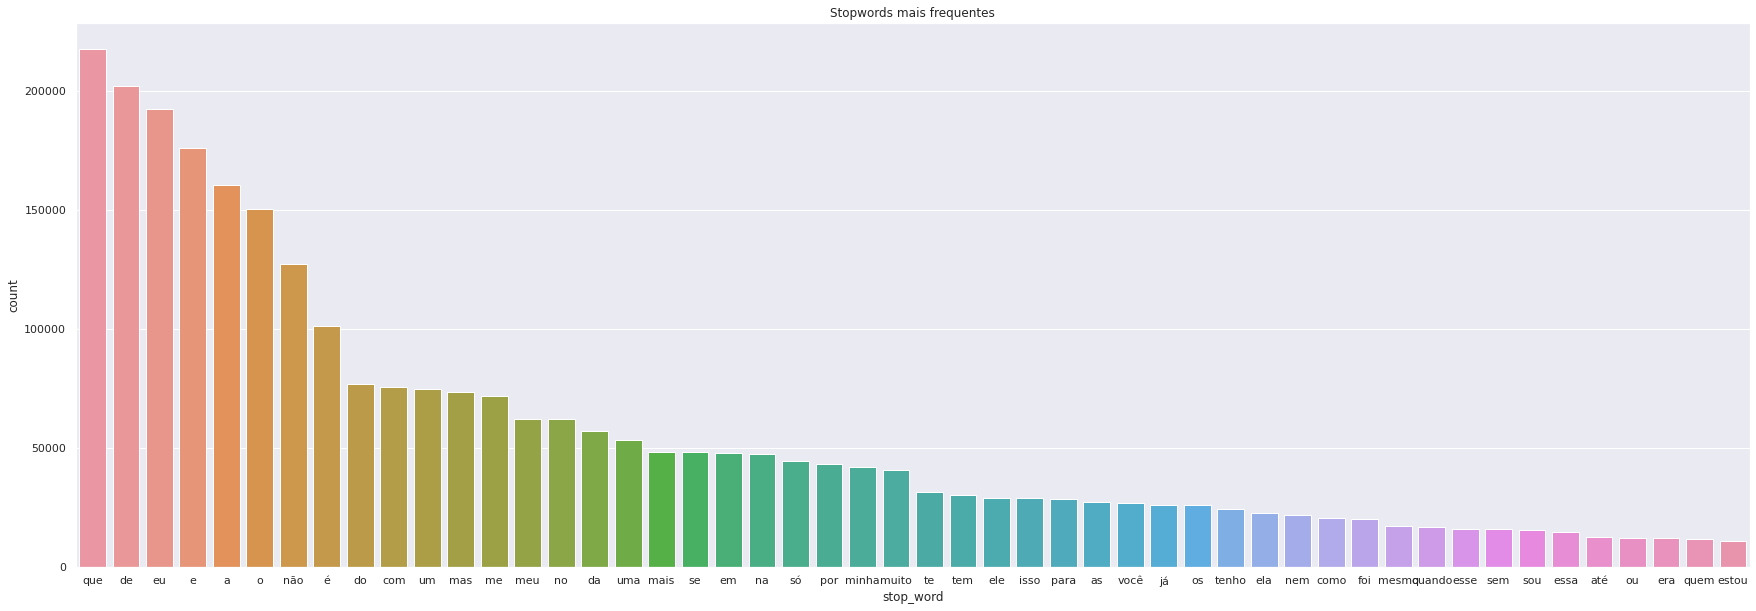

In [31]:
from collections import defaultdict

dic = defaultdict(int)

# stopwords = nltk.corpus.stopwords.words("portuguese")

print("analyzed stopwords:\n", stopwords)


for word in (all_text).split():
    if word in stopwords:
        dic[word] += 1


top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes")
plt.show()

## O nltk considera como stop words algumas palavras que podem conter cunho sentimental, por conta disso essas palavras serão removidas desse vetor.

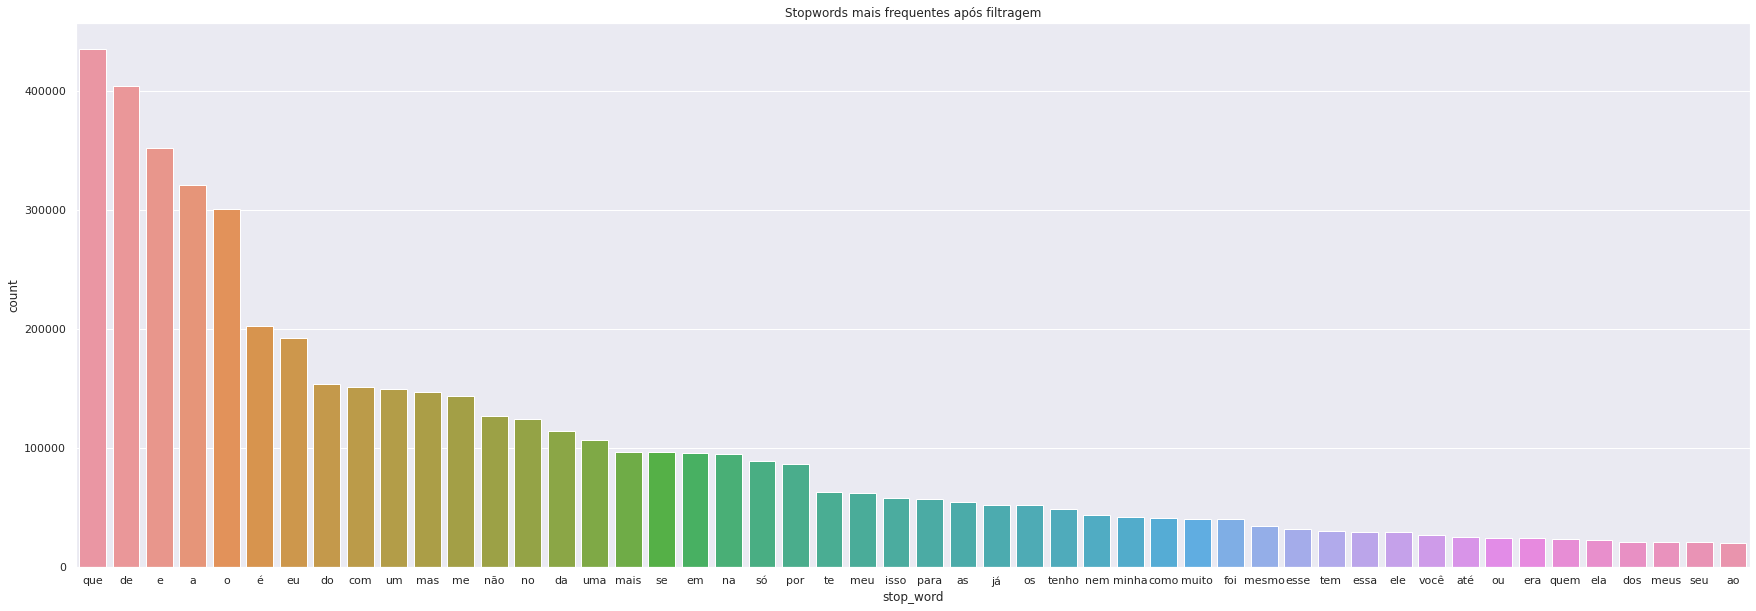

In [32]:
relevant_stop_words = [
    "eu",
    "não",
    "meu",
    "minha",
    "muito",
    "você",
    "tem",
    "ele",
    "ela",
    "quando",
    "sou",
    "você",
    "sem",
    "estou",
]  # stopwords consideradas relevantes para análise de sentimento, serão mantinidas em todo o processo de análise
stopwords = list(
    filter(lambda x: x not in relevant_stop_words, stopwords)
)  # remove do conjunto de stopwords palavras que não serão consideradas para filtragem

for word in all_text.split():
    if word in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes após filtragem")
plt.show()

## Análise das palavras mais frequentes que não são stop words.

#### Nota-se que há várias expressões e abreviações comuns  na internet e na língua portuguesa.

[(':(', 349509), ('que', 217731), ('de', 202119), ('eu', 192378), ('e', 176015), ('a', 160725), ('o', 150299), (':)', 147728), ('não', 127146), ('é', 101098), ('do', 76999), ('com', 75489), ('um', 74911), ('pra', 73960), ('mas', 73467), ('me', 71640), ('meu', 62303), ('no', 62028), ('da', 57194), ('uma', 53419), ('q', 48551), ('mais', 48457), ('se', 48291), ('em', 47979), ('na', 47644), ('só', 44435), ('por', 43113), ('minha', 41927), ('muito', 40540), ('queria', 36030), ('to', 34908), ('vou', 33541), ('—', 33247), (':((', 31795), ('te', 31579), ('Eu', 30986), ('tem', 30274), ('ele', 28897), ('vai', 28814), ('isso', 28733), ('para', 28428), ('as', 27085), ('ter', 26981), ('você', 26677), ('vc', 26593), ('já', 26122), ('n', 25861), ('os', 25801), ('ser', 25369), (':D', 24292), ('pq', 24155), ('tenho', 24149), ('tá', 22889), ('ela', 22793), ('dia', 22737), ('bem', 22245), ('tão', 21963), ('nem', 21833), ('triste', 21664), ('ver', 21244), ('como', 20421), ('fazer', 20216), ('foi', 20160),

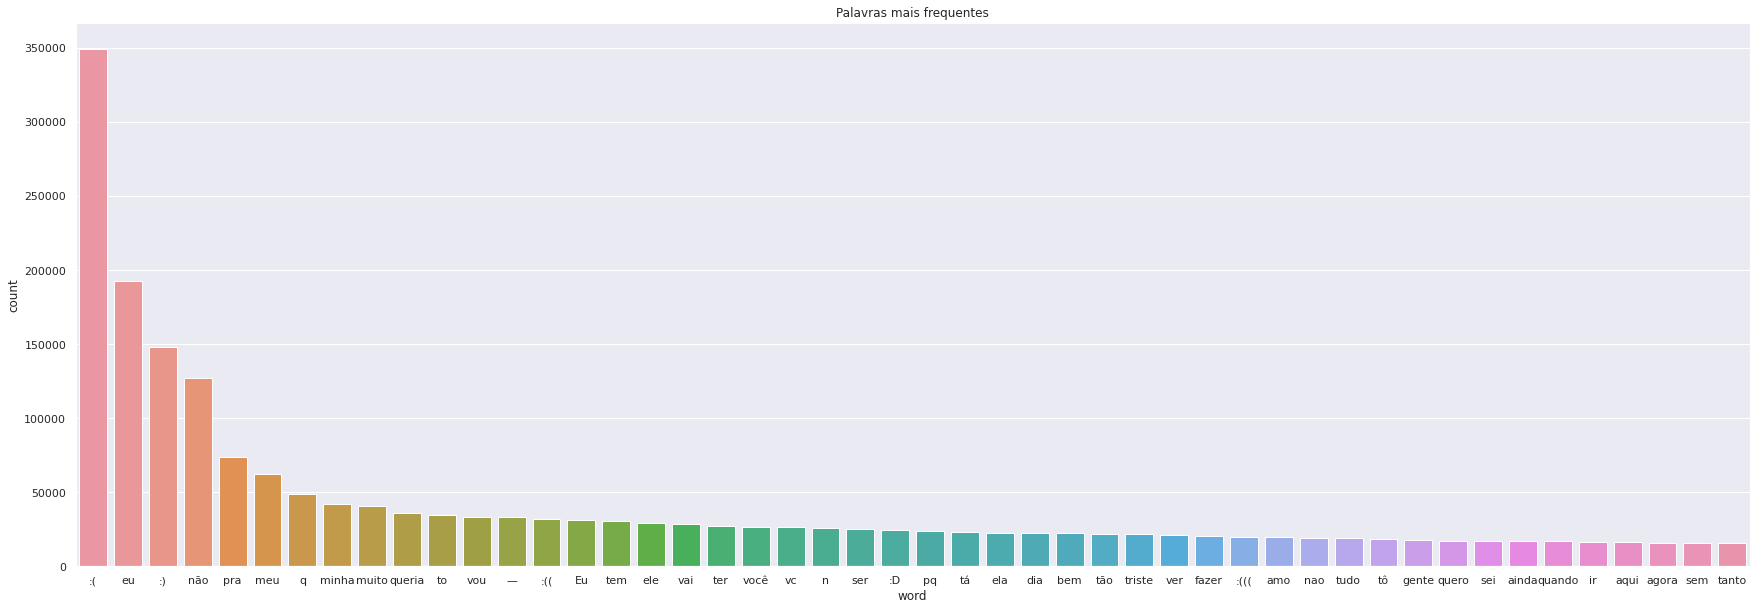

In [33]:
from collections import Counter


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)

most_common_words = list(zip(x, y))

most_common_words_df = pd.DataFrame(
    most_common_words, columns=["word", "count"]
)  # cria um dataframe com as palavras mais frequentes

sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_df)
plt.title("Palavras mais frequentes")
plt.show()

## Adiciona stopwords com palavras ou símbolos não relevantes para análise(descoberto com os gráficos anteriores).

In [34]:
invalid_terms = [
    ":p",  # indentificava apenas como "p"
    ":d",  # indentificava apenas como "d"
    "(",
    "pra",
    "q",
    "_",
    "((",
    "pq",
    "ai"
]  # palavras inrelevantes para análise de sentimento, ou termos abreviados já contidos em stopwords

stopwords.extend(invalid_terms)

counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


most_common_words_filtered = list(zip(x, y))

most_common_words_filtered_df = pd.DataFrame(
    most_common_words_filtered, columns=["word", "count"]
)

[(':(', 349509), ('que', 217731), ('de', 202119), ('eu', 192378), ('e', 176015), ('a', 160725), ('o', 150299), (':)', 147728), ('não', 127146), ('é', 101098), ('do', 76999), ('com', 75489), ('um', 74911), ('pra', 73960), ('mas', 73467), ('me', 71640), ('meu', 62303), ('no', 62028), ('da', 57194), ('uma', 53419), ('q', 48551), ('mais', 48457), ('se', 48291), ('em', 47979), ('na', 47644), ('só', 44435), ('por', 43113), ('minha', 41927), ('muito', 40540), ('queria', 36030), ('to', 34908), ('vou', 33541), ('—', 33247), (':((', 31795), ('te', 31579), ('Eu', 30986), ('tem', 30274), ('ele', 28897), ('vai', 28814), ('isso', 28733), ('para', 28428), ('as', 27085), ('ter', 26981), ('você', 26677), ('vc', 26593), ('já', 26122), ('n', 25861), ('os', 25801), ('ser', 25369), (':D', 24292), ('pq', 24155), ('tenho', 24149), ('tá', 22889), ('ela', 22793), ('dia', 22737), ('bem', 22245), ('tão', 21963), ('nem', 21833), ('triste', 21664), ('ver', 21244), ('como', 20421), ('fazer', 20216), ('foi', 20160),

### plot das palavras mais frequentes após a filtragem

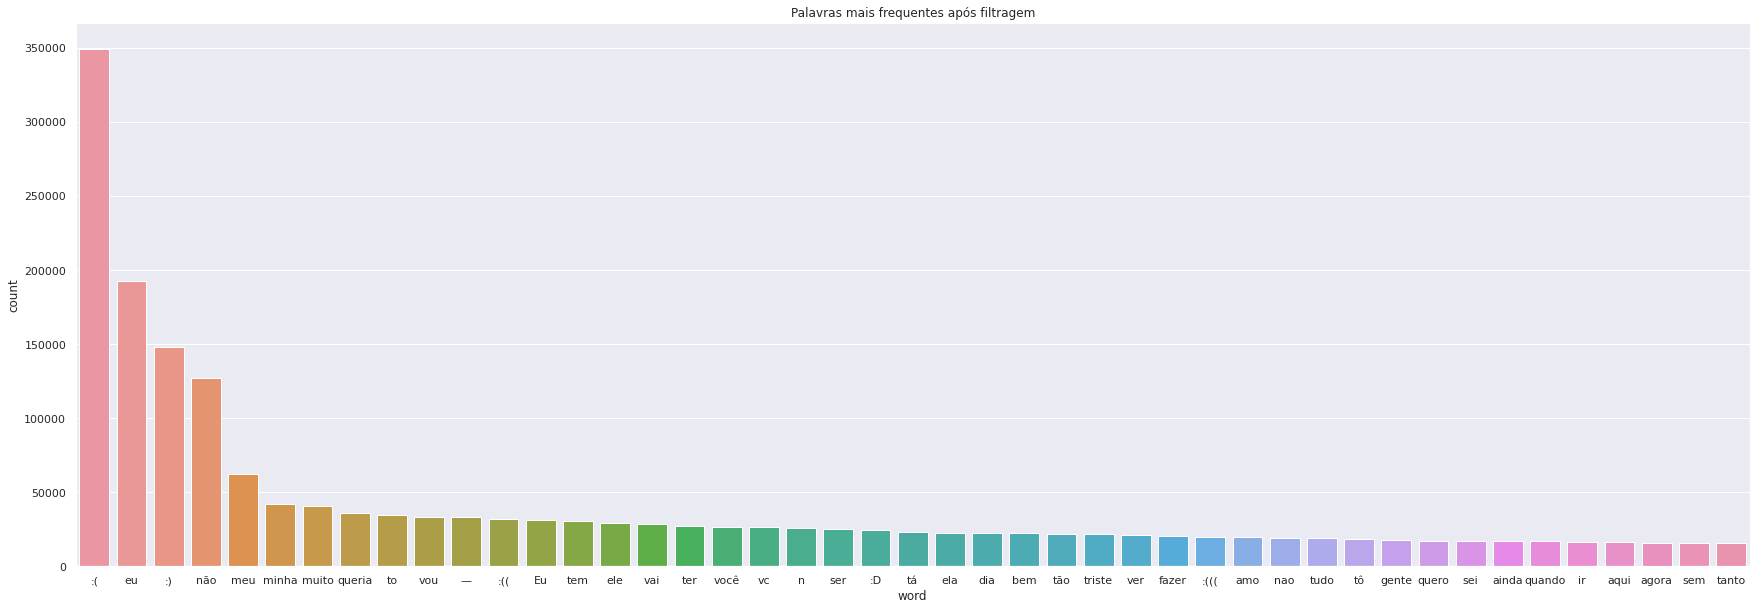

In [35]:
sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_filtered_df)
plt.title("Palavras mais frequentes após filtragem")
plt.show()

<h1 style="color:purple">REMOÇÃO DE STOPWORDS</h1>

### Utilizando as análises anteriores é definido um conjunto final de stop words e utilizado para filtrar todos os corpus

In [36]:
final_stop_words = stopwords

positive_filter = remover_stop_words(positive_text, final_stop_words)
negative_filter = remover_stop_words(negative_text, final_stop_words)
all_text_filter = remover_stop_words(all_text, final_stop_words)

<h2 style="color:red"> Plot do Texto Completo</h2>

### Plotagem visual das palavras mais comuns em cada um dos corpus.

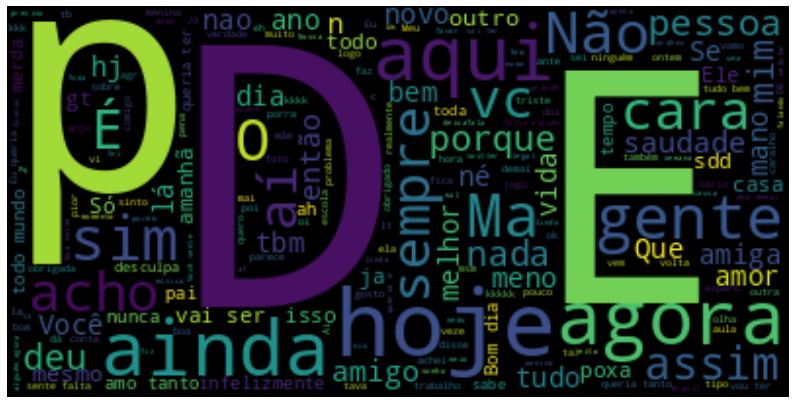

In [37]:
wordcloud = WordCloud().generate(all_text_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
# Generate a word cloud image
wordcloud = WordCloud().generate(positive_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

### Lematização

### Steaming

<h3 style="color:blue">SEM REMOÇÃO DAS STOPWORDS</h3>

### Lematização

### Steaming